In [1]:
import pandas as pd


In [2]:
stores_df = pd.read_csv("Stores.csv")

In [3]:
stores_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
stores_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [16]:
stores_df[stores_df["Store_Sales"] > 100000]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
408,409,1303,1587,1310,102310
432,433,1365,1638,680,102920
557,558,1137,1374,700,101780
649,650,1989,2414,860,116320
758,759,1486,1758,820,101820
866,867,1565,1854,900,100900
868,869,1775,2104,980,105150


In [17]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Sales')

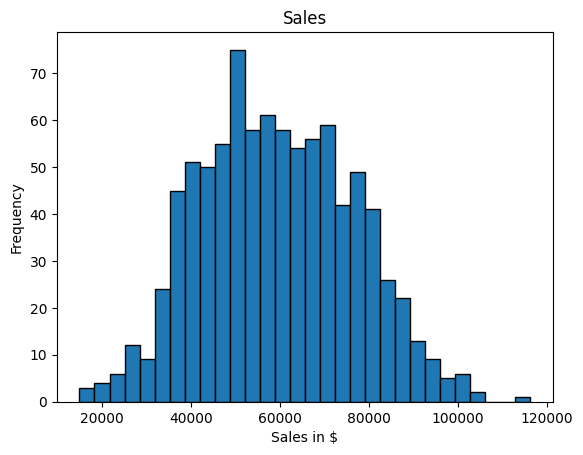

In [25]:
plt.hist(stores_df["Store_Sales"], bins = 30, edgecolor = "black")
plt.xlabel("Sales in $")
plt.ylabel("Frequency")
plt.title("Sales")

In [26]:
stores_df["Sales_Area"] = stores_df["Store_Sales"]/stores_df["Store_Area"]

In [27]:
stores_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Area
0,1,1659,1961,530,66490,40.078360
1,2,1461,1752,210,39820,27.255305
2,3,1340,1609,720,54010,40.305970
3,4,1451,1748,620,53730,37.029635
4,5,1770,2111,450,46620,26.338983


In [28]:
import seaborn as sns

In [29]:
stores_df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_Area
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486,0.092847
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474,-0.446563
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849,-0.444898
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629,0.035523
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000,0.826939
Sales_Area,0.092847,-0.446563,-0.444898,0.035523,0.826939,1.000000


<AxesSubplot:>

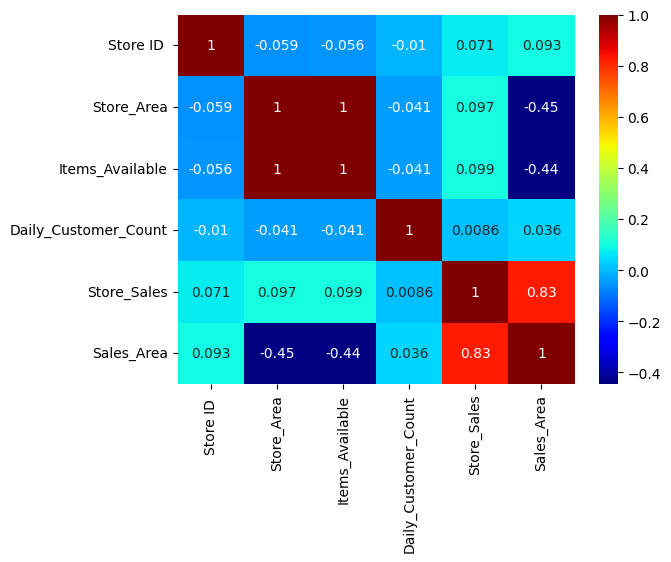

In [35]:
sns.heatmap(stores_df.corr(),annot=True,cmap="jet")

In [36]:
from sklearn.model_selection import train_test_split

In [42]:
data, labels = stores_df.drop(["Store ID ","Store_Sales"], axis=1), stores_df["Store_Sales"] 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [45]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [46]:
predictions = linear_regression.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(predictions, y_test)**0.5

3294.484197549969